This program adds new features to the data such as weekday, month, year, hour and distance based on pickup_datetime. Run this program after Data_Clean.ipynb

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#read the processed files generated in Data_Clean_FirstStep.ipynb
data = pd.read_csv("/content/gdrive/My Drive/Big_Data/data_file.csv")

In [0]:
data['pickup_datetime'] = data['pickup_datetime'].str.slice(0,19)
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M:%S')

In [0]:
#calculate month and weekday, hour, year and date
data['month'] = data['pickup_datetime'].dt.month
data['weekday'] = data['pickup_datetime'].dt.weekday
data['hour'] = data['pickup_datetime'].dt.hour
data['date'] = data['pickup_datetime'].dt.date
data['year'] = data['pickup_datetime'].dt.year

In [0]:
#calculate haversine distance in miles
origin = (data['pickup_latitude'], data['pickup_longitude'])
dist = (data['dropoff_latitude'], data['dropoff_longitude'])
r =3959.87433  
s_lat = origin[0]*np.pi/180.0                      
s_lng = np.deg2rad(origin[1])     
e_lat = np.deg2rad(dist[0])                       
e_lng = np.deg2rad(dist[1])  
d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
data['haversine_distance'] = 2 * r * np.arcsin(np.sqrt(d)) 

In [0]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,hour,year,dist,haversine_distance
count,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07,5.341752e+07
mean,1.130503e+01,-7.397546e+01,4.075091e+01,-7.397456e+01,4.075129e+01,1.691314e+00,6.269478e+00,3.041377e+00,1.351172e+01,2.011744e+03,3.429874e-02,2.080733e+00
std,9.462360e+00,3.435572e-02,2.671305e-02,3.413025e-02,3.065106e-02,1.307018e+00,3.436813e+00,1.949181e+00,6.516743e+00,1.866715e+00,3.842275e-02,2.222836e+00
min,1.000000e+00,-7.403000e+01,4.055000e+01,-7.440000e+01,4.050000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.009000e+03,1.000000e-06,5.219211e-05
25%,6.000000e+00,-7.399227e+01,4.073661e+01,-7.399157e+01,4.073563e+01,1.000000e+00,3.000000e+00,1.000000e+00,9.000000e+00,2.010000e+03,1.305916e-02,7.950092e-01
50%,8.500000e+00,-7.398211e+01,4.075340e+01,-7.398062e+01,4.075389e+01,1.000000e+00,6.000000e+00,3.000000e+00,1.400000e+01,2.012000e+03,2.202929e-02,1.353299e+00
75%,1.250000e+01,-7.396844e+01,4.076754e+01,-7.396552e+01,4.076839e+01,2.000000e+00,9.000000e+00,5.000000e+00,1.900000e+01,2.013000e+03,3.896845e-02,2.449540e+00
max,5.000000e+02,-7.298106e+01,4.095999e+01,-7.298451e+01,4.095999e+01,9.000000e+00,1.200000e+01,6.000000e+00,2.300000e+01,2.015000e+03,1.201253e+00,6.331830e+01


In [0]:
#The month as January=1, December=12.
data['month'].value_counts().plot.bar(color = 'violet',figsize=(7,7));
plt.title('Histogram of month'); plt.xlabel('month'); plt.ylabel('Count');

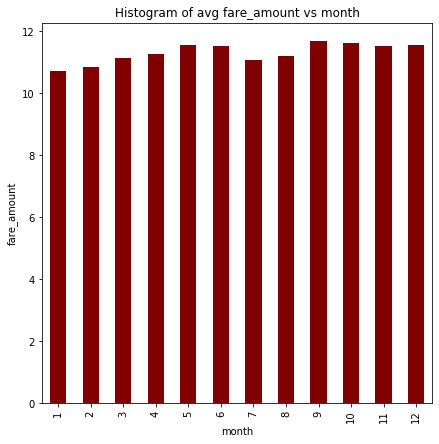

In [0]:
data.groupby(by='month').agg(['mean']).plot.bar(y='fare_amount', figsize=(7,7),legend=False,color='maroon')
plt.title('Histogram of avg fare_amount vs month'); plt.xlabel('month'); plt.ylabel('fare_amount');

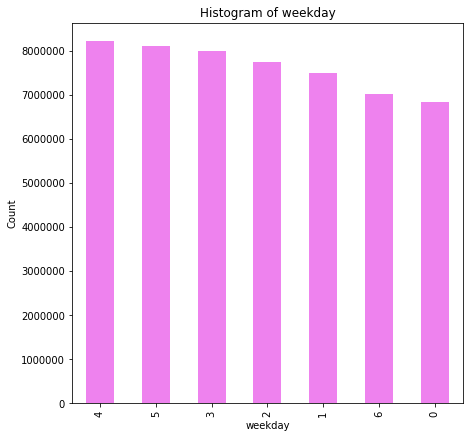

In [0]:
#The day of the week with Monday=0, Sunday=6.
# As we see below, Trips on Friday is greater than other days
data['weekday'].value_counts().plot.bar(color = 'violet',figsize=(7,7));
plt.title('Histogram of weekday'); plt.xlabel('weekday'); plt.ylabel('Count');

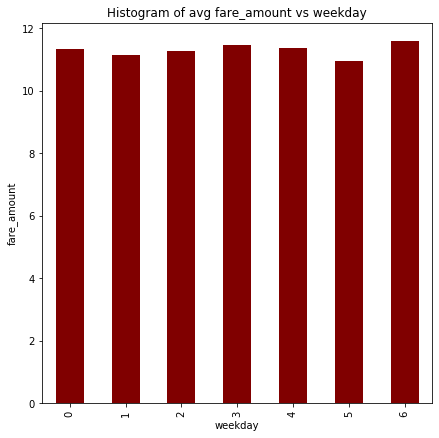

In [0]:
#as we see below, even though number of trips on friday is more but avg fare is more on sunday as compared to friday.
data.groupby(by='weekday').agg(['mean']).plot.bar(y='fare_amount', figsize=(7,7),legend=False,color='maroon')
plt.title('Histogram of avg fare_amount vs weekday'); plt.xlabel('weekday'); plt.ylabel('fare_amount');


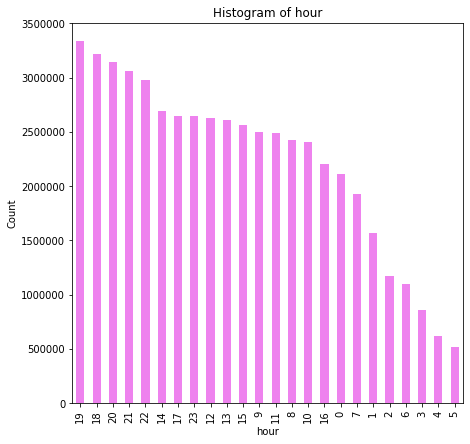

In [0]:
data['hour'].value_counts().plot.bar(color = 'violet', figsize=(7,7));
plt.title('Histogram of hour'); plt.xlabel('hour'); plt.ylabel('Count');

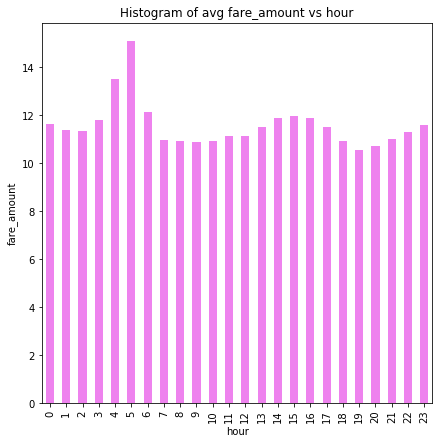

In [0]:
#plot avg fare amount vs hour
#even though number of trips is less @5 am. However, avg fare @5am is greater than rest of time slot.
data.groupby(by='hour').agg(['mean']).plot.bar(y='fare_amount', figsize=(7,7),legend=False,color='violet')
plt.title('Histogram of avg fare_amount vs hour'); plt.xlabel('hour'); plt.ylabel('fare_amount');


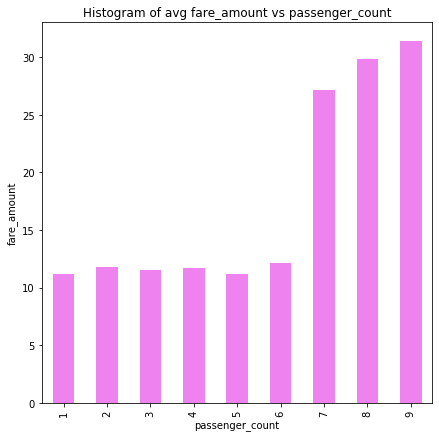

In [0]:
data.groupby(by='passenger_count').agg(['mean']).plot.bar(y='fare_amount', figsize=(7,7),legend=False,color='violet')
plt.title('Histogram of avg fare_amount vs passenger_count'); plt.xlabel('passenger_count'); plt.ylabel('fare_amount');

In [0]:
data.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,hour,date,year,haversine_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,0,17,2009-06-15,2009,0.640668
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,1,16,2010-01-05,2010,5.252153
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,3,0,2011-08-18,2011,0.863655
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012-04-21,2012,1.739877
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,1,7,2010-03-09,2010,1.242569


In [0]:
#create a new feather file
data.to_feather("/content/gdrive/My Drive/Big_Data/data_features")

In [0]:
#read feather file
data1 = pd.read_feather("/content/gdrive/My Drive/Big_Data/data_features")

In [0]:
data1.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,hour,date,year,haversine_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,0,17,2009-06-15,2009,0.640668
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,1,16,2010-01-05,2010,5.252153
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,3,0,2011-08-18,2011,0.863655
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,5,4,2012-04-21,2012,1.739877
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,1,7,2010-03-09,2010,1.242569


In [0]:
data1.shape

(53417521, 14)

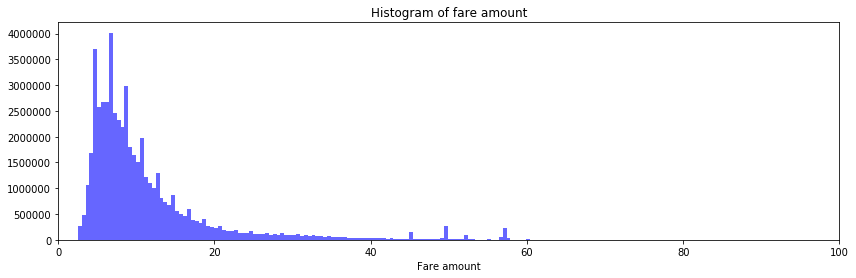

In [0]:
plt.figure(figsize = (14, 4))
plt.hist(data1['fare_amount'], 1000, facecolor='blue', alpha=0.6)
plt.xlabel('Fare amount')
plt.title('Histogram of fare amount')
plt.xlim(0, 100)
plt.show();